## patent-exploratory-data-analysis_Pfizer

### Data Dictionary

df_patents (dataframe)

titles -- patent titles

dates -- issue date of patents

num_inventors -- number or inventors

num_pc -- number of patent citations

num_npc -- number of non-patent citations

num_rb -- number of references by other patents

num_class -- number of patent classifications

num_le -- number of legal events

cum_rbs -- cumulative references (sum of num_rbs)

yearly_sales 

### Create plots for date and time plots. 

In [1]:
import numpy as np
import pandas as pd

df_patents = pd.read_csv('xoutput_pfizer.csv')
print (df_patents)

      Unnamed: 0 patent_no                                       url  \
0              0   4243595  https://www.google.com/patents/US4243595   
1              1   4243666  https://www.google.com/patents/US4243666   
2              2   4243672  https://www.google.com/patents/US4243672   
3              3   4243674  https://www.google.com/patents/US4243674   
4              4   4244887  https://www.google.com/patents/US4244887   
5              5   4244951  https://www.google.com/patents/US4244951   
6              6   4245049  https://www.google.com/patents/US4245049   
7              7   4245053  https://www.google.com/patents/US4245053   
8              8   4246263  https://www.google.com/patents/US4246263   
9              9   4247462  https://www.google.com/patents/US4247462   
10            10   4247568  https://www.google.com/patents/US4247568   
11            11   4247699  https://www.google.com/patents/US4247699   
12            12   4248882  https://www.google.com/patents/US424

####  Turn string values into integers. 

In [2]:
df_patents['num_inventor'] = df_patents['num_inventor'].astype(int)
df_patents['num_pc'] = df_patents['num_pc'].astype(int)
df_patents['num_npc'] = df_patents['num_npc'].astype(int)
df_patents['num_rb'] = df_patents['num_rb'].astype(int)
df_patents['num_class'] = df_patents['num_class'].astype(int)
df_patents['num_le'] = df_patents['num_le'].astype(int)
df_patents['num_patent'] = df_patents['num_patent'].astype(int)
df_patents['yearly_sales'] = df_patents['yearly_sales'].astype(int)

In [3]:
df_patents = df_patents.drop(['Unnamed: 0'], axis=1)

In [4]:
df_patents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 13 columns):
patent_no       1704 non-null object
url             1704 non-null object
title           1704 non-null object
issue_date      1704 non-null object
date            1704 non-null object
num_patent      1704 non-null int64
num_inventor    1704 non-null int64
num_pc          1704 non-null int64
num_npc         1704 non-null int64
num_rb          1704 non-null int64
num_class       1704 non-null int64
num_le          1704 non-null int64
yearly_sales    1704 non-null int64
dtypes: int64(8), object(5)
memory usage: 173.1+ KB


In [5]:
df_patents.describe()

,num_patent,num_inventor,num_pc,num_npc,num_rb,num_class,num_le,yearly_sales
count,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000,1704.000000
mean,1282.500000,2.146127,7.166667,5.117958,27.884977,22.754108,4.661972,7838.443075
std,492.046746,1.251802,8.059915,10.545745,74.101363,18.507778,2.189402,4003.423838
min,431.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3250.000000
25%,856.750000,1.000000,2.000000,0.000000,2.000000,11.000000,4.000000,4476.000000
50%,1282.500000,2.000000,5.000000,2.000000,8.000000,18.000000,5.000000,7144.000000
75%,1708.250000,3.000000,9.000000,6.000000,23.000000,28.000000,6.000000,11306.000000
max,2134.000000,9.000000,113.000000,247.000000,1243.000000,183.000000,14.000000,16204.000000


### Plot various quantities. 

In [6]:
num_patents = []

value  = (df_patents['num_patent'])
num_patents.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_patent'] = value 


In [7]:
yearly_sales = []

value  = (df_patents['yearly_sales'])
yearly_sales.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['yearly_sales'] = value 


In [8]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [9]:
num_rbs = []

value  = (df_patents['num_rb'])
num_rbs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_rb'] = value 


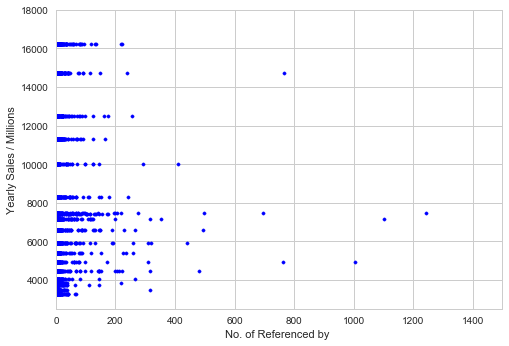

In [10]:
# Scatter plot of 'Referenced by' vs. Annual Sales. 

plt.scatter(num_rbs, yearly_sales, marker = 'o', color = 'blue', s = 11 )
plt.xlabel("No. of Referenced by ")
plt.ylabel("Yearly Sales / Millions")
plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,1500), ylim = (2500,18000))
plt.show()

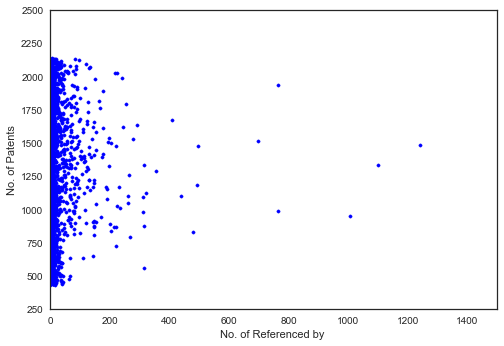

In [11]:
plt.scatter(num_rbs, num_patents, marker = 'o', color = 'blue', s = 11 )
plt.xlabel("No. of Referenced by ")
plt.ylabel("No. of Patents")
plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,1500), ylim = (250,2500))
plt.show()

### Calculate cumulative references. 

In [12]:
# Cumulative references are num_rb.  

cum_rb = 0

for row in df_patents.iterrows():
    df_patents['cum_rb'] = df_patents.num_rb.cumsum()


In [13]:
cum_rbs = []

value  = (df_patents['cum_rb'])
cum_rbs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['cum_rb'] = value 


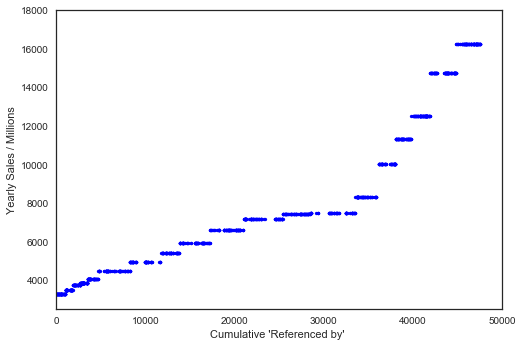

In [14]:
plt.scatter(cum_rbs, yearly_sales, marker = 'o', color = 'blue', s = 9 )
plt.xlabel("Cumulative 'Referenced by' ")
plt.ylabel("Yearly Sales / Millions")
plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,50000), ylim = (2500,18000))
plt.show()

###  Plot1.

### Calculate citations per patent (cpp).  This is the same number as 'Referenced by'. 

In [15]:
df_patents['cpp'] = df_patents['num_rb']/df_patents['num_patent'] 

In [16]:
cpps = []

value = df_patents.cpp.cumsum()
cpps.append(value)

#print cpps

In [17]:
# Add a column of the cumulative cpp - cumulative citations per patent - to the dataframe. 

for row in df_patents.iterrows():
    df_patents['cum_cpp'] = df_patents.cpp.cumsum()
#print (df_patents['cum_cpp']) 

cum_cpps = []

value = df_patents.cum_cpp.cumsum()
cum_cpps.append(value)
     

In [18]:
#print (df_patents)

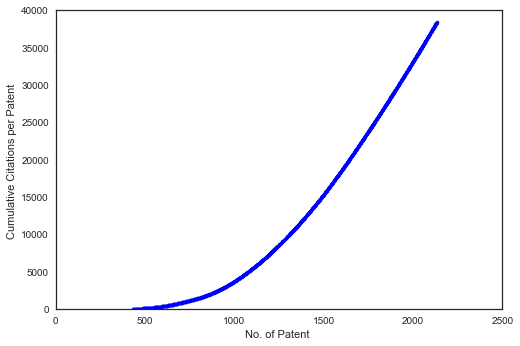

In [21]:
plt.scatter(num_patents, cum_cpps, marker = 'o', color = 'blue', s = 9 )
plt.xlabel("No. of Patent ")
plt.ylabel("Cumulative Citations per Patent ")
plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,2500), ylim = (0,40000))
plt.show()

## Drop patents where number of 'Referenced by' is 0, i.e., num_rb  = 0. 

In [22]:
# Drop rows with num_rb = 0.  See if regression is different.  

df_patents = df_patents[df_patents.num_rb != 0]
print (len(df_patents))


1482


### Renumber the index column.  

In [23]:
# Renumber the index so that the plots are numbered correctly. 

df_patents = df_patents.reset_index()
del df_patents['index']

print (df_patents)       # Looks okay.  

     patent_no                                       url  \
0      4243666  https://www.google.com/patents/US4243666   
1      4243672  https://www.google.com/patents/US4243672   
2      4243674  https://www.google.com/patents/US4243674   
3      4244951  https://www.google.com/patents/US4244951   
4      4245049  https://www.google.com/patents/US4245049   
5      4245053  https://www.google.com/patents/US4245053   
6      4246263  https://www.google.com/patents/US4246263   
7      4247462  https://www.google.com/patents/US4247462   
8      4247568  https://www.google.com/patents/US4247568   
9      4248882  https://www.google.com/patents/US4248882   
10     4251563  https://www.google.com/patents/US4251563   
11     4252811  https://www.google.com/patents/US4252811   
12     4252812  https://www.google.com/patents/US4252812   
13     4252957  https://www.google.com/patents/US4252957   
14     4253918  https://www.google.com/patents/US4253918   
15     4254250  https://www.google.com/p

### Calculate the logarithm of the cum_rb, log_cum_rb.   

In [24]:
# Calculate the log_cum_rb. 

for row in df_patents.iterrows():
    df_patents['log_cum_rb'] = np.log(df_patents.cum_rb)

#print (df_patents)

In [25]:
# Add log_cum_rb to the dataframe. 

log_cum_rbs = []

value  = (df_patents['log_cum_rb'])
log_cum_rbs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['log_cum_rb'] = value 


In [26]:
# Re-run the annual sales list to make it the same size as log_rbs.

yearly_sales = []

value  = (df_patents['yearly_sales'])
yearly_sales.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['yearly_sales'] = value 


In [27]:
num_rbs = []

value  = (df_patents['num_rb'])
num_rbs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_rb'] = value 


In [ ]:
#print (df_patents)

### Calculate the log (yearly_sales).

In [28]:
# Calculate the log of yearly sales. 

for row in df_patents.iterrows():
    df_patents['log_yearly_sales'] = np.log(df_patents.yearly_sales)

#print (df_patents)

In [29]:
log_yearly_sales = []

value  = (df_patents['log_yearly_sales'])
log_yearly_sales.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['log_yearly_sales'] = value 


In [30]:
cum_rbs = []

value  = (df_patents['cum_rb'])
cum_rbs.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['cum_rb'] = value 


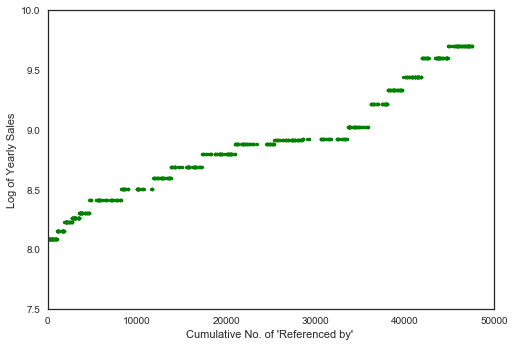

In [31]:
plt.scatter(cum_rbs, log_yearly_sales, marker = 'o', color = 'green', s = 9 )
plt.xlabel("Cumulative No. of 'Referenced by' ")
plt.ylabel("Log of Yearly Sales")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(0,50000), ylim = (7.5,10))
plt.show()

### Fig_1 with truncated data set (num_rb = 0 has been removed from dataframe.) 

### Go back to number of patents for another pass. 

In [32]:
num_patents = []

value  = (df_patents['num_patent'])
num_patents.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['num_patent'] = value 


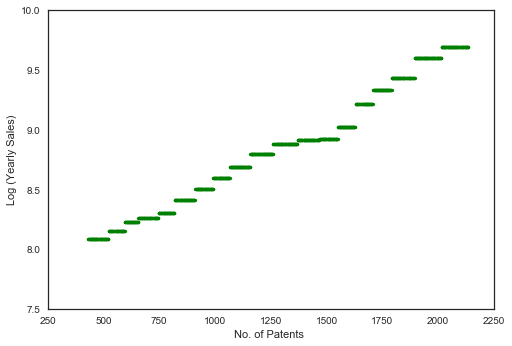

In [33]:
plt.scatter(num_patents, log_yearly_sales, marker = 'o', color = 'green', s = 9 )
plt.xlabel("No. of Patents ")
plt.ylabel("Log (Yearly Sales)")

plt.style.use('seaborn-white')
ax = plt.axes()
ax.set(xlim=(250,2250), ylim = (7.5,10))
plt.show()

### Fig_2   Number of patents versus yearly sales (num_rb = 0.) 

###  Convert date from patent into datetime. 

In [34]:
df_patents['issue_date']  = pd.to_datetime(df_patents['date'])
print df_patents['issue_date']

0      1981-01-06
1      1981-01-06
2      1981-01-06
3      1981-01-13
4      1981-01-13
5      1981-01-13
6      1981-01-20
7      1981-01-27
8      1981-01-27
9      1981-02-03
10     1981-02-17
11     1981-02-24
12     1981-02-24
13     1981-02-24
14     1981-03-03
15     1981-03-03
16     1981-03-10
17     1981-03-17
18     1981-03-17
19     1981-03-17
20     1981-03-24
21     1981-03-24
22     1981-03-24
23     1981-03-31
24     1981-03-31
25     1981-04-07
26     1981-04-07
27     1981-04-07
28     1981-04-14
29     1981-04-21
          ...    
1452   1999-10-19
1453   1999-10-19
1454   1999-10-19
1455   1999-10-19
1456   1999-10-26
1457   1999-11-02
1458   1999-11-02
1459   1999-11-02
1460   1999-11-02
1461   1999-11-09
1462   1999-11-09
1463   1999-11-09
1464   1999-11-16
1465   1999-11-23
1466   1999-11-23
1467   1999-11-23
1468   1999-11-30
1469   1999-11-30
1470   1999-12-07
1471   1999-12-07
1472   1999-12-07
1473   1999-12-14
1474   1999-12-14
1475   1999-12-14
1476   199

### Try to plot No. Patents vs. Date.  

In [35]:
# Issue_dates is the string of data generated from converting 'date' into datetime format. 

from datetime import datetime

times = []

time1  = pd.to_datetime(df_patents['date'])
times.append(time1)

for row in df_patents.iterrows():      
    df_patents['times'] = time1


### Perform time plots here.  

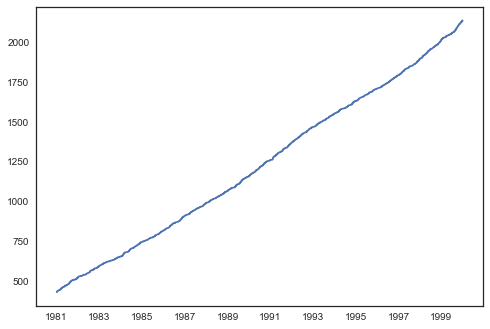

In [36]:
# It worked. Looks like a line 

x = pd.to_datetime(df_patents['date'])
y = df_patents['num_patent']

plt.plot(x,y)


In [37]:
# List time values in dataframe. 

print df_patents

     patent_no                                       url  \
0      4243666  https://www.google.com/patents/US4243666   
1      4243672  https://www.google.com/patents/US4243672   
2      4243674  https://www.google.com/patents/US4243674   
3      4244951  https://www.google.com/patents/US4244951   
4      4245049  https://www.google.com/patents/US4245049   
5      4245053  https://www.google.com/patents/US4245053   
6      4246263  https://www.google.com/patents/US4246263   
7      4247462  https://www.google.com/patents/US4247462   
8      4247568  https://www.google.com/patents/US4247568   
9      4248882  https://www.google.com/patents/US4248882   
10     4251563  https://www.google.com/patents/US4251563   
11     4252811  https://www.google.com/patents/US4252811   
12     4252812  https://www.google.com/patents/US4252812   
13     4252957  https://www.google.com/patents/US4252957   
14     4253918  https://www.google.com/patents/US4253918   
15     4254250  https://www.google.com/p

### Convert 'Date' column in dataframe into a timestamp and then into a list. 

In [38]:
# Date is a string value in the dataframe. Turn 'Date' into timestamp and then into a list. 

tvalue  = pd.to_datetime(df_patents['date'])
list (tvalue)


[Timestamp('1981-01-06 00:00:00'),
 Timestamp('1981-01-06 00:00:00'),
 Timestamp('1981-01-06 00:00:00'),
 Timestamp('1981-01-13 00:00:00'),
 Timestamp('1981-01-13 00:00:00'),
 Timestamp('1981-01-13 00:00:00'),
 Timestamp('1981-01-20 00:00:00'),
 Timestamp('1981-01-27 00:00:00'),
 Timestamp('1981-01-27 00:00:00'),
 Timestamp('1981-02-03 00:00:00'),
 Timestamp('1981-02-17 00:00:00'),
 Timestamp('1981-02-24 00:00:00'),
 Timestamp('1981-02-24 00:00:00'),
 Timestamp('1981-02-24 00:00:00'),
 Timestamp('1981-03-03 00:00:00'),
 Timestamp('1981-03-03 00:00:00'),
 Timestamp('1981-03-10 00:00:00'),
 Timestamp('1981-03-17 00:00:00'),
 Timestamp('1981-03-17 00:00:00'),
 Timestamp('1981-03-17 00:00:00'),
 Timestamp('1981-03-24 00:00:00'),
 Timestamp('1981-03-24 00:00:00'),
 Timestamp('1981-03-24 00:00:00'),
 Timestamp('1981-03-31 00:00:00'),
 Timestamp('1981-03-31 00:00:00'),
 Timestamp('1981-04-07 00:00:00'),
 Timestamp('1981-04-07 00:00:00'),
 Timestamp('1981-04-07 00:00:00'),
 Timestamp('1981-04-

1482


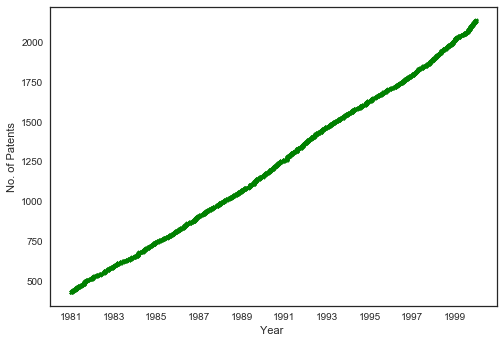

In [39]:
plt.scatter(list(tvalue), num_patents, marker = 'x', s =10, c = 'green')
plt.xlabel("Year ")
plt.ylabel("No. of Patents")

print len(list(tvalue))
# Miracle, it worked on May 23, 2017 at 8:56 am and a little before.  Praise God!

### Fig_3 Number of patents versus year (num_rb = 0 has been removed from dataframe.) 

In [40]:
tvalues = []

tvalue  = pd.to_datetime(df_patents['date'])
list (tvalue)
tvalues.append(list(tvalue))

for row in df_patents.iterrows():      
    df_patents['tvalue'] = tvalue


### Create an Excel file and use it to plot Number of Patents versus time. 

In [41]:
# Use plots.xlsx to create plots below.  Read csv files in with x and y data.  Cull unnecessary data columns.  

from openpyxl import Workbook

df_plots = df_patents
#print (df_plots)

writer = pd.ExcelWriter('/Users/stevehansen/Desktop/pfizer_timeplot1.xlsx')
df_plots.to_excel(writer,'Sheet1')
writer.save()

### Create new data frame for plotting time series data.  Call it df_plots.

In [42]:
df_plots = pd.read_csv('/Users/stevehansen/Desktop/pfizer_timeplot1.csv')
print df_plots

      num_patent              tvalue
0            432  1981-01-06 0:00:00
1            433  1981-01-06 0:00:00
2            434  1981-01-06 0:00:00
3            436  1981-01-13 0:00:00
4            437  1981-01-13 0:00:00
5            438  1981-01-13 0:00:00
6            439  1981-01-20 0:00:00
7            440  1981-01-27 0:00:00
8            441  1981-01-27 0:00:00
9            443  1981-02-03 0:00:00
10           444  1981-02-17 0:00:00
11           445  1981-02-24 0:00:00
12           446  1981-02-24 0:00:00
13           447  1981-02-24 0:00:00
14           448  1981-03-03 0:00:00
15           449  1981-03-03 0:00:00
16           450  1981-03-10 0:00:00
17           451  1981-03-17 0:00:00
18           452  1981-03-17 0:00:00
19           453  1981-03-17 0:00:00
20           454  1981-03-24 0:00:00
21           455  1981-03-24 0:00:00
22           456  1981-03-24 0:00:00
23           457  1981-03-31 0:00:00
24           458  1981-03-31 0:00:00
25           459  1981-04-07 0:00:00
2

### Yearly sales versus time. 

1482


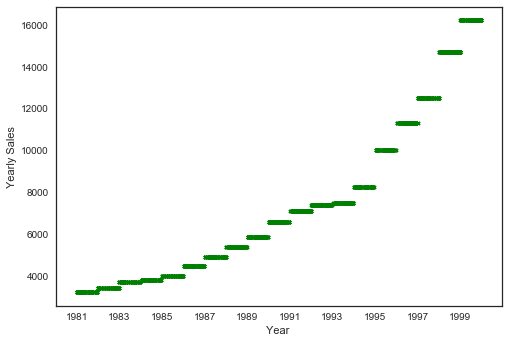

In [43]:
plt.scatter(list(tvalue), yearly_sales, marker = 'x', s =10, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Yearly Sales")

print len(list(tvalue))

### Fig_4.  Plot number of Yearly Sales by year. (num_rb = 0)

1482


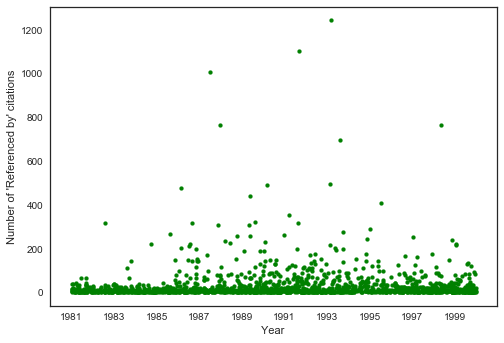

In [44]:
plt.scatter(list(tvalue), num_rbs, marker = 'o', s =15, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Number of 'Referenced by' citations")

print len(list(tvalue))

### Fig_4.  Plot number of 'Referenced by' citations by year. (num_rb = 0)

1482


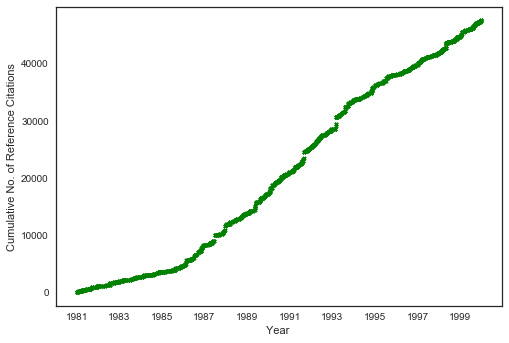

In [45]:
plt.scatter(list(tvalue), cum_rbs, marker = 'x', s =10, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Cumulative No. of Reference Citations")

print len(list(tvalue))

### Fig_5.  Plot number of 'Cumulative Referenced by' citations by year. (num_rb = 0)

### Convert time stamp into days. 

In [46]:
# https://stackoverflow.com/questions/24588437/convert-date-to-float-for-linear-regression-on-pandas-data-frame

df_test = pd.read_csv('/Users/stevehansen/Desktop/pfizer_timeplot1.csv')
df_test['tvalue'] = pd.to_datetime(df_test['tvalue'])    
df_test['time_delta'] = (df_test['tvalue'] - df_test['tvalue'].min())  / np.timedelta64(1,'D')

In [47]:
print df_test

days = []

value  = (df_test['time_delta'])
days.append(value)
#print value    

for row in df_patents.iterrows():      
    df_patents['time_delta'] = value 


      num_patent     tvalue  time_delta
0            432 1981-01-06         0.0
1            433 1981-01-06         0.0
2            434 1981-01-06         0.0
3            436 1981-01-13         7.0
4            437 1981-01-13         7.0
5            438 1981-01-13         7.0
6            439 1981-01-20        14.0
7            440 1981-01-27        21.0
8            441 1981-01-27        21.0
9            443 1981-02-03        28.0
10           444 1981-02-17        42.0
11           445 1981-02-24        49.0
12           446 1981-02-24        49.0
13           447 1981-02-24        49.0
14           448 1981-03-03        56.0
15           449 1981-03-03        56.0
16           450 1981-03-10        63.0
17           451 1981-03-17        70.0
18           452 1981-03-17        70.0
19           453 1981-03-17        70.0
20           454 1981-03-24        77.0
21           455 1981-03-24        77.0
22           456 1981-03-24        77.0
23           457 1981-03-31        84.0


In [48]:
# Calculate citations per patent per day, cpd.  

cpds = []

value =  df_patents['num_rb']/(13140 - df_patents['time_delta'])

for row in df_patents.iterrows():      
    df_patents['cpd'] = value

value  = (df_patents['cpd'])
cpds.append(value)

#print (len (cpds))
print cpds

[0       0.001142
1       0.000152
2       0.000609
3       0.002970
4       0.001066
5       0.000533
6       0.000686
7       0.000534
8       0.002973
9       0.001449
10      0.000305
11      0.000153
12      0.000611
13      0.000229
14      0.001299
15      0.000994
16      0.000382
17      0.000383
18      0.000689
19      0.000230
20      0.003139
21      0.000536
22      0.000383
23      0.000613
24      0.001225
25      0.000766
26      0.000383
27      0.002606
28      0.000460
29      0.000153
          ...   
1452    0.000159
1453    0.005414
1454    0.000478
1455    0.000159
1456    0.001275
1457    0.004309
1458    0.002075
1459    0.000319
1460    0.000319
1461    0.005592
1462    0.000479
1463    0.000479
1464    0.000960
1465    0.002402
1466    0.002882
1467    0.001922
1468    0.002244
1469    0.000321
1470    0.001765
1471    0.015246
1472    0.000481
1473    0.001125
1474    0.002571
1475    0.013175
1476    0.002089
1477    0.001126
1478    0.000483
1479    0.003

### Citations per day.

1482


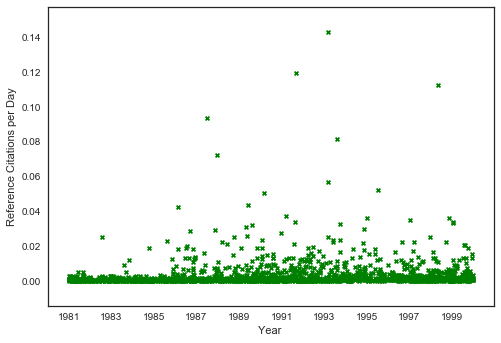

In [49]:
plt.scatter(list(tvalue), cpds, marker = 'x', s =15, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Reference Citations per Day")

print len(list(tvalue))

In [50]:
# Calculate cumulative citations per day, cum_cpd.  

cum_cpds = []
cum_cpd = 0 

value =  df_patents['cum_rb']/(13140 - df_patents['time_delta']    # 13140 is the number of days from 1981 to 2017

for row in df_patents.iterrows(): 
    cum_cpd = cum_cpd + value
    df_patents['cum_cpd'] = cum_cpd

value  = (df_patents['cum_cpd'])
cum_cpds.append(cum_cpd)

print cum_cpds

[0           1.691781
1           1.917352
2           2.819635
3           7.222112
4           8.801949
5           9.591868
6          10.613134
7          11.409559
8          15.815230
9          17.971171
10         18.442968
11         18.679245
12         19.584906
13         19.924528
14         21.860746
15         23.333231
16         23.912365
17         24.492119
18         25.512624
19         25.852793
20         30.518105
21         31.312256
22         31.879507
23         32.804688
24         34.620864
25         35.775155
26         36.343015
27         40.204460
28         40.907836
29         41.157192
            ...     
1452    11103.908599
1453    11111.932166
1454    11112.640127
1455    11112.876115
1456    11127.166906
1457    11145.983402
1458    11149.058091
1459    11149.531120
1460    11150.004149
1461    11170.761463
1462    11171.471801
1463    11172.182138
1464    11186.113244
1465    11202.211369
1466    11206.482946
1467    11209.330665
1468    1122

1482


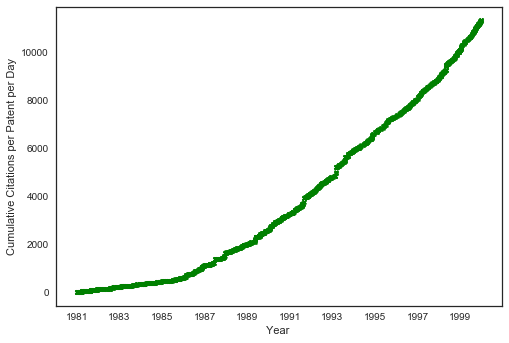

In [51]:
plt.scatter(list(tvalue), cum_cpds, marker = 'x', s =15, c = 'green')
plt.xlabel("Year ")
plt.ylabel("Cumulative Citations per Patent per Day")

print len(list(tvalue))

### Plot cumulative patents per day versus yearly sales. 

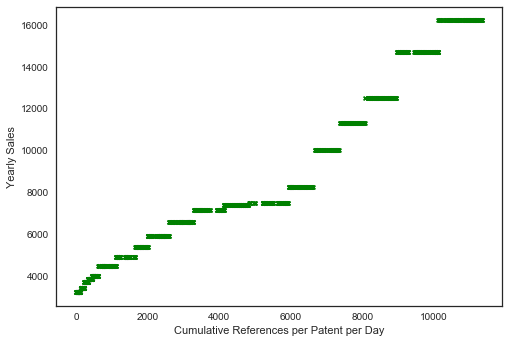

In [52]:
plt.scatter(cum_cpds, yearly_sales, marker = 'x', s =15, c = 'green')
plt.xlabel("Cumulative References per Patent per Day" )
plt.ylabel("Yearly Sales")


### Correlations.

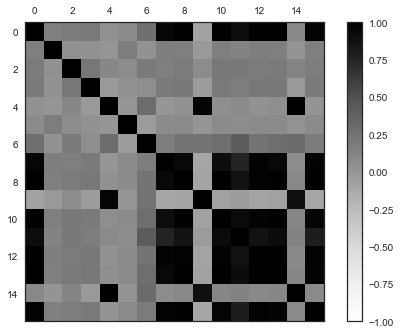

In [53]:
names = ['num_patent','num_inventor', 'num_pc', 'num_npc', 'num_rb', 'num_class', 'num_le', 'yearly_sales', 'cum_rb',
        'log_rb', 'log_yearly_sales', 'cpd', 'cum_cpd']

import seaborn as sns
correlations = df_patents.corr()

fig = plt.figure()
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin= -1, vmax = 1)
fig.colorbar(cax)
plt.show()

### Use Seaborn correlation matrix. 

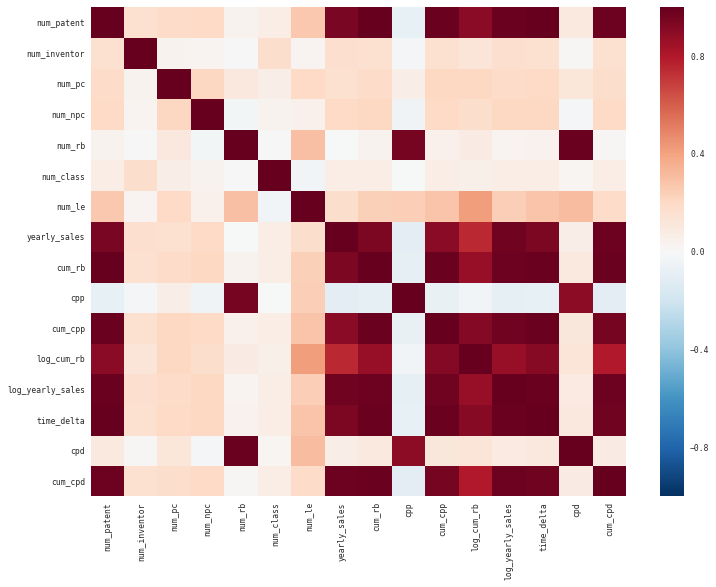

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="paper", font="monospace")

# Load the datset of correlations.

corr = df_patents.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Fig_6.  Correlation matrix. (num_rb = 0)

In [55]:
df_patents.describe()         # num_rb = 0

,num_patent,num_inventor,num_pc,num_npc,num_rb,num_class,num_le,yearly_sales,cum_rb,cpp,cum_cpp,log_cum_rb,log_yearly_sales,time_delta,cpd,cum_cpd
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,1283.984480,2.136977,7.368421,5.147773,32.062078,23.336032,4.750337,7848.040486,22497.353576,0.027148,22.572229,9.502538,8.843502,3677.101889,0.003582,4257.624251
std,489.431213,1.241091,8.306943,10.956381,78.613553,18.758436,2.221317,4011.795386,15767.961654,0.066861,13.022881,1.329193,0.496470,2016.817946,0.008743,3546.187460
min,432.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,3250.000000,15.000000,0.000475,0.034722,2.708050,8.086410,0.000000,0.000077,1.691781
25%,868.250000,1.000000,2.250000,0.000000,4.000000,11.000000,4.000000,4476.000000,6523.250000,0.003298,9.817346,8.783128,8.406485,2023.000000,0.000399,869.610192
50%,1278.500000,2.000000,5.000000,2.000000,10.000000,18.000000,5.000000,7144.000000,21281.000000,0.008931,23.850088,9.965570,8.874028,3703.000000,0.001056,3341.998728
75%,1707.750000,3.000000,10.000000,6.000000,28.000000,29.000000,6.000000,10984.750000,38059.500000,0.023270,35.285866,10.546906,9.302926,5477.500000,0.003146,7361.076643
max,2134.000000,9.000000,113.000000,247.000000,1243.000000,183.000000,14.000000,16204.000000,47516.000000,1.061181,40.232642,10.768822,9.693013,6930.000000,0.142956,11339.567150
